In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv("scholarship.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   semester_percentage     1000 non-null   float64
 1   scholarship_exam_marks  1000 non-null   int64  
 2   got_scholarship         1000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 23.6 KB


In [5]:
data.head(5)

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


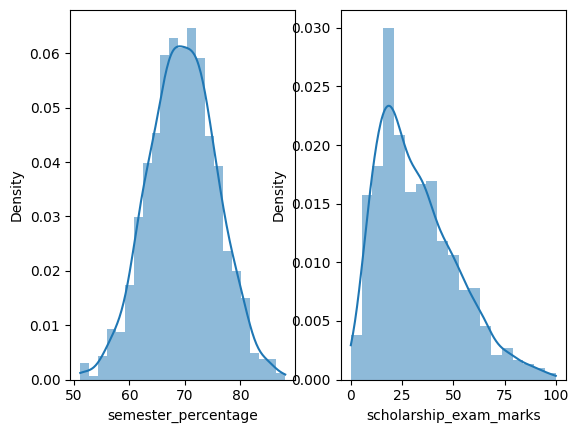

In [23]:
plt.subplot(1,2,1)
sns.histplot(data["semester_percentage"],  kde=True, stat="density", linewidth=0)
# sns.distplot(data["semester_percentage"])
plt.subplot(1,2,2)
sns.histplot(data["scholarship_exam_marks"],  kde=True, stat="density", linewidth=0)
plt.show()

# Hence we can Observe that the semester_percentage is a Normal Distribution and the scholarship_exam_marks is a Skewed Distribution

In [ ]:
print("Mean = ", data["semester_percentage"].mean())
print("Std = " ,data["semester_percentage"].std())
print("Max = " ,data["semester_percentage"].max())
print("Min = " ,data["semester_percentage"].min())

Mean =  69.6124
Std =  6.158978751323897
Max =  91.2
Min =  48.9


In [9]:
#Finding the boundary values
# mean = mue , std = sigma , z = (x-mue)/sigma normal Distribution

Highest_allowed = data["semester_percentage"].mean() + 3*data["semester_percentage"].std()
Lowest_allowed = data["semester_percentage"].mean() - 3*data["semester_percentage"].std()
print("Highest_allowed : " , Highest_allowed)
print("Lowest_allowed : " , Lowest_allowed)

Highest_allowed :  88.08933625397168
Lowest_allowed :  51.13546374602831


In [10]:
# finding the outliers
data[(data["semester_percentage"]<Lowest_allowed) | (data["semester_percentage"]>Highest_allowed) ]

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


In [11]:
#Trimming
data[(data["semester_percentage"]>Lowest_allowed) & (data["semester_percentage"]<Highest_allowed) ]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [ ]:
# another method to trim
data["z_score"] = (data["semester_percentage"]-data["semester_percentage"].mean())/data["semester_percentage"].std()

In [ ]:
data[data["z_score"]<-3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [ ]:
data[data["z_score"]>3]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062


In [ ]:
data[(data["z_score"]>-3) & (data["z_score"]<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


In [14]:
#capping
upper_limit = data["semester_percentage"].mean()+ 3* data["semester_percentage"].std()
lower_limit = data["semester_percentage"].mean()- 3* data["semester_percentage"].std()

In [15]:
data["semester_percentage"] =np.where(data["semester_percentage"]>upper_limit,
        upper_limit,
        np.where(data["semester_percentage"]<lower_limit, lower_limit, data["semester_percentage"] ))

In [16]:
data

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.900000,26,1
1,74.600000,38,1
2,75.400000,40,1
3,64.200000,8,1
4,72.300000,17,0
...,...,...,...
995,88.089336,44,1
996,88.089336,65,1
997,51.135464,34,0
998,86.200000,46,1


In [17]:
# Plotting of Normal Distribution
from scipy import stats
import numpy as np
from matplotlib import pyplot as pyt



In [18]:
x_data = np.arange(-5,5,0.00001)
y_data = stats.norm.pdf(x_data,0,1)
z_data = stats.norm.pdf(x_data , 0 ,2)

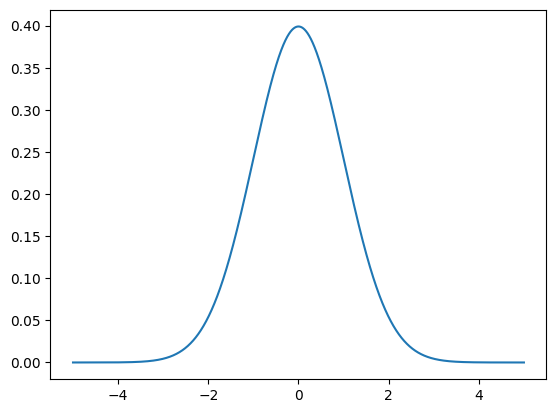

In [19]:
plt.plot(x_data , y_data)

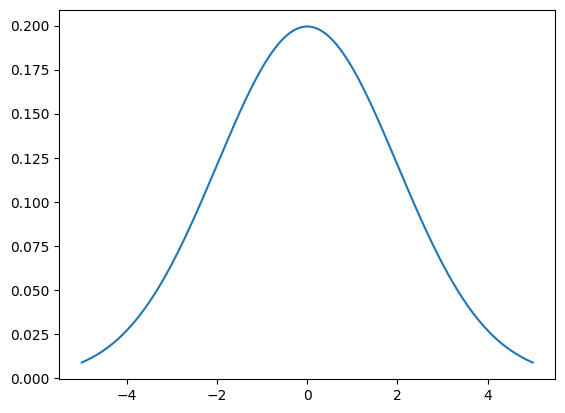

In [20]:
plt.plot(x_data,z_data)